<a href="https://colab.research.google.com/github/Shardul003/CAR-PRICE-PREDICTION/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [9]:
dataset=pd.read_csv('train.csv')

In [10]:
dataset.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,18344,104.9,2700,134,3.43,72,175.0,66.1,False,False,...,False,False,False,True,False,False,False,False,True,False
1,15580,107.9,3075,120,3.46,95,186.7,68.4,True,False,...,False,False,False,True,False,False,False,False,True,False
2,6918,95.7,2280,92,3.05,62,169.7,63.6,True,False,...,False,False,False,True,False,False,False,False,False,False
3,7499,94.5,1971,97,3.15,69,165.3,63.8,True,False,...,False,False,False,True,False,False,False,False,True,False
4,9095,96.5,2289,110,3.15,86,167.5,65.2,True,False,...,False,False,False,True,False,False,False,False,False,False


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       164 non-null    int64  
 1   wheelbase   164 non-null    float64
 2   curbweight  164 non-null    int64  
 3   enginesize  164 non-null    int64  
 4   boreratio   164 non-null    float64
 5   horsepower  164 non-null    int64  
 6   carlength   164 non-null    float64
 7   carwidth    164 non-null    float64
 8   gas         164 non-null    bool   
 9   turbo       164 non-null    bool   
 10  hardtop     164 non-null    bool   
 11  hatchback   164 non-null    bool   
 12  sedan       164 non-null    bool   
 13  wagon       164 non-null    bool   
 14  fwd         164 non-null    bool   
 15  rwd         164 non-null    bool   
 16  dohcv       164 non-null    bool   
 17  l           164 non-null    bool   
 18  ohc         164 non-null    bool   
 19  ohcf        164 non-null    b

In [13]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
dataset[num_vars] = scaler.fit_transform(dataset[num_vars])

In [14]:
columns = list(dataset.columns)
for column in columns[8:]:
    dataset[column] = dataset[column].astype(int)

In [22]:
if 'price' in dataset.columns:
    y_train = dataset.pop('price')
    X_train = dataset
else:
    print("The 'price' column has already been removed from the dataset.")

The 'price' column has already been removed from the dataset.


In [24]:
print(X_train.shape)
print(y_train.shape)

(164, 29)
(164,)


In [25]:
lm = LinearRegression()


In [26]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)


In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', False, 12),
 ('curbweight', True, 1),
 ('enginesize', False, 5),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 19),
 ('hardtop', False, 14),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 17),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', False, 15),
 ('ohcf', False, 7),
 ('ohcv', False, 6),
 ('rotor', False, 11),
 ('five', False, 4),
 ('four', False, 2),
 ('six', False, 3),
 ('three', False, 20),
 ('twelve', True, 1),
 ('two', False, 9),
 ('Medium', False, 10),
 ('Highend', True, 1)]

In [28]:
X_train.columns[rfe.support_]

Index(['curbweight', 'boreratio', 'horsepower', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [29]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]


In [30]:
X_train_rfe.head()


,curbweight,boreratio,horsepower,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
0,0.392078,0.635714,0.084746,0.409524,0,1,0,0,0,0
1,0.558968,0.657143,0.182203,0.628571,0,1,0,0,0,0
2,0.205162,0.364286,0.042373,0.171429,0,0,1,0,0,0
3,0.067646,0.435714,0.072034,0.190476,0,1,0,0,0,0
4,0.209168,0.435714,0.144068,0.323810,1,0,0,0,0,0


In [32]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() #fitting the model
    print(lm.summary()) # model summary
    return X

In [33]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [34]:
X_train_rfe.shape


(164, 10)

In [35]:
X_train_new = build_model(X_train_rfe,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     231.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           5.86e-87
Time:                        16:34:22   Log-Likelihood:                 266.07
No. Observations:                 164   AIC:                            -510.1
Df Residuals:                     153   BIC:                            -476.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0811      0.023      3.525      0.0

In [36]:
X_train_new = X_train_rfe.drop(["twelve"],axis=1) #High p value


In [37]:
X_train_new.shape


(164, 9)

In [38]:
checkVIF(X_train_new)


,features,VIF
0,curbweight,20.05
3,carwidth,19.30
1,boreratio,10.92
2,horsepower,8.80
5,sedan,4.09
4,hatchback,3.09
6,wagon,1.96
8,Highend,1.81
7,dohcv,1.28


NEW MODEL


In [39]:
X_train_new = build_model(X_train_new,y_train)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     252.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.13e-87
Time:                        16:38:14   Log-Likelihood:                 264.15
No. Observations:                 164   AIC:                            -508.3
Df Residuals:                     154   BIC:                            -477.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0860      0.023      3.734      0.0

In [40]:
checkVIF(X_train_new)


,features,VIF
0,const,35.00
1,curbweight,6.85
6,sedan,5.27
5,hatchback,4.98
4,carwidth,4.09
3,horsepower,3.38
7,wagon,3.10
2,boreratio,1.78
9,Highend,1.62
8,dohcv,1.35


In [41]:
X_train_new = X_train_new.drop(['curbweight'],axis=1)


NEW MODEL

In [42]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     248.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.83e-84
Time:                        16:38:39   Log-Likelihood:                 253.49
No. Observations:                 164   AIC:                            -489.0
Df Residuals:                     155   BIC:                            -461.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0616      0.024      2.583      0.0

In [43]:
checkVIF(X_train_new)


,features,VIF
0,const,33.16
5,sedan,5.26
4,hatchback,4.97
6,wagon,2.93
2,horsepower,2.55
3,carwidth,1.99
1,boreratio,1.67
8,Highend,1.60
7,dohcv,1.19


In [44]:
X_train_new = X_train_new.drop(['sedan'],axis=1)


Dropping 'sedan' because of high VIF value

NEW MODEL


In [45]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     236.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.39e-79
Time:                        16:40:51   Log-Likelihood:                 239.08
No. Observations:                 164   AIC:                            -462.2
Df Residuals:                     156   BIC:                            -437.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0404      0.016     -2.500      0.0

In [46]:
checkVIF(X_train_new)


,features,VIF
0,const,12.81
2,horsepower,2.39
3,carwidth,1.82
1,boreratio,1.61
7,Highend,1.57
4,hatchback,1.22
6,dohcv,1.17
5,wagon,1.13


Dropping wagon because of high p value


In [47]:
X_train_new = X_train_new.drop(['wagon'],axis=1)

NEW MODEL

In [48]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     275.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.19e-80
Time:                        16:42:08   Log-Likelihood:                 238.66
No. Observations:                 164   AIC:                            -463.3
Df Residuals:                     157   BIC:                            -441.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0415      0.016     -2.578      0.0

In [49]:
checkVIF(X_train_new)


,features,VIF
0,const,12.73
2,horsepower,2.39
3,carwidth,1.81
1,boreratio,1.60
6,Highend,1.51
5,dohcv,1.17
4,hatchback,1.13


NEW MODEL

In [50]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     332.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           6.46e-82
Time:                        16:42:56   Log-Likelihood:                 238.62
No. Observations:                 164   AIC:                            -465.2
Df Residuals:                     158   BIC:                            -446.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0446      0.011     -3.899      0.0

,features,VIF
0,const,6.49
1,horsepower,2.17
2,carwidth,1.70
5,Highend,1.51
4,dohcv,1.17
3,hatchback,1.11


In [51]:
X_train_new = X_train_new.drop(['dohcv'],axis=1)


NEW MODEL


In [52]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     354.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           4.27e-78
Time:                        16:44:12   Log-Likelihood:                 226.35
No. Observations:                 164   AIC:                            -442.7
Df Residuals:                     159   BIC:                            -427.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0314      0.012     -2.622      0.0

In [53]:
checkVIF(X_train_new)


,features,VIF
0,const,6.15
1,horsepower,2.07
2,carwidth,1.69
4,Highend,1.51
3,hatchback,1.09


In [54]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [55]:
error = y_train-y_train_price


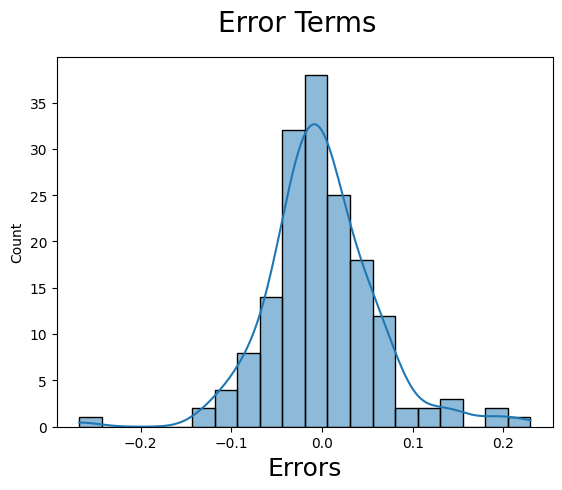

In [56]:
fig = plt.figure()
sns.histplot(error, bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [60]:
dataset1 = pd.read_csv('test.csv')
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
dataset1[num_vars] = scaler.fit_transform(dataset1[num_vars])

In [63]:
columns = list(dataset1.columns)
for column in columns[8:]:
    dataset1[column] = dataset1[column].astype(int)


In [64]:
y_test = dataset1.pop('price')
X_test = dataset1

In [65]:
X_train_new = X_train_new.drop(['const'],axis=1)


In [66]:
X_test_new = X_test[X_train_new.columns]

In [67]:
X_test_new.head()


,horsepower,carwidth,hatchback,Highend
0,0.985294,0.578947,0,1
1,0.823529,0.666667,1,0
2,0.360294,0.429825,0,0
3,0.455882,0.543860,1,0
4,0.551471,0.877193,0,1


In [68]:
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7958107319549521

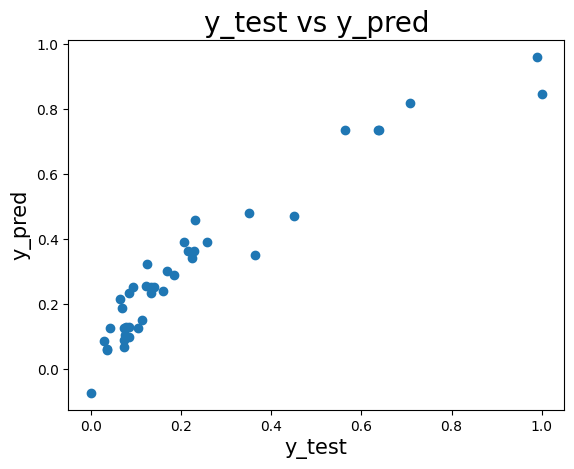

In [70]:
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('y_pred',fontsize=15)
plt.show()


In [71]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     354.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           4.27e-78
Time:                        16:50:53   Log-Likelihood:                 226.35
No. Observations:                 164   AIC:                            -442.7
Df Residuals:                     159   BIC:                            -427.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0314      0.012     -2.622      0.0